In [ ]:
from scipy import sparse
import joblib
from google.colab import drive

drive.mount('/content/drive')
X_train = sparse.load_npz("/content/drive/MyDrive/FYP/X_train_tfidf.npz")
X_test  = sparse.load_npz("/content/drive/MyDrive/FYP/X_test_tfidf.npz")

y_train = joblib.load("/content/drive/MyDrive/FYP/y_train.pkl")
y_test  = joblib.load("/content/drive/MyDrive/FYP/y_test.pkl")


Mounted at /content/drive


In [ ]:
import joblib
from scipy import sparse
import numpy as np

# Load sparse matrices
X_train = sparse.load_npz("/content/drive/MyDrive/FYP/X_train_tfidf.npz")
X_test  = sparse.load_npz("/content/drive/MyDrive/FYP/X_test_tfidf.npz")

# Load labels stored as .pkl using joblib
y_train = joblib.load("/content/drive/MyDrive/FYP/y_train.pkl")
y_test = joblib.load("/content/drive/MyDrive/FYP/y_test.pkl")

print("Shapes:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", len(y_train))
print("y_test :", len(y_test))

Shapes:
X_train: (193588, 20000)
X_test : (48397, 20000)
y_train: 193588
y_test : 48397


Original Data:
X_train: (193588, 20000), X_test: (48397, 20000)
Train - Non-suicide: 100770, Suicide: 92818
Test - Non-suicide: 25192, Suicide: 23205

Original class distribution:
Class 0: 100770 samples
Class 1: 92818 samples

Balanced class distribution:
Class 0: 100770 samples
Class 1: 100770 samples

TRAINING CUSTOM SVM


Training SVM on 201540 samples with 20000 features
Learning rate: 0.5, Lambda: 1e-05

Iter    1 | Acc: 0.5728 | SVs:  10000 | Pred(+1): 151714 | Pred(-1):  49826
Iter  100 | Acc: 0.6345 | SVs:   9875 | Pred(+1): 172658 | Pred(-1):  28882
Iter  200 | Acc: 0.7941 | SVs:   9640 | Pred(+1):  74604 | Pred(-1): 126936
Iter  300 | Acc: 0.8059 | SVs:   8417 | Pred(+1):  78875 | Pred(-1): 122665
Iter  400 | Acc: 0.8224 | SVs:   7413 | Pred(+1):  85512 | Pred(-1): 116028
Iter  500 | Acc: 0.8304 | SVs:   6747 | Pred(+1):  88856 | Pred(-1): 112684
Iter  600 | Acc: 0.8360 | SVs:   6414 | Pred(+1):  90835 | Pred(-1): 110705
Iter  700 | Acc: 0.8412 | SVs:   6117 | Pred(+1):  930

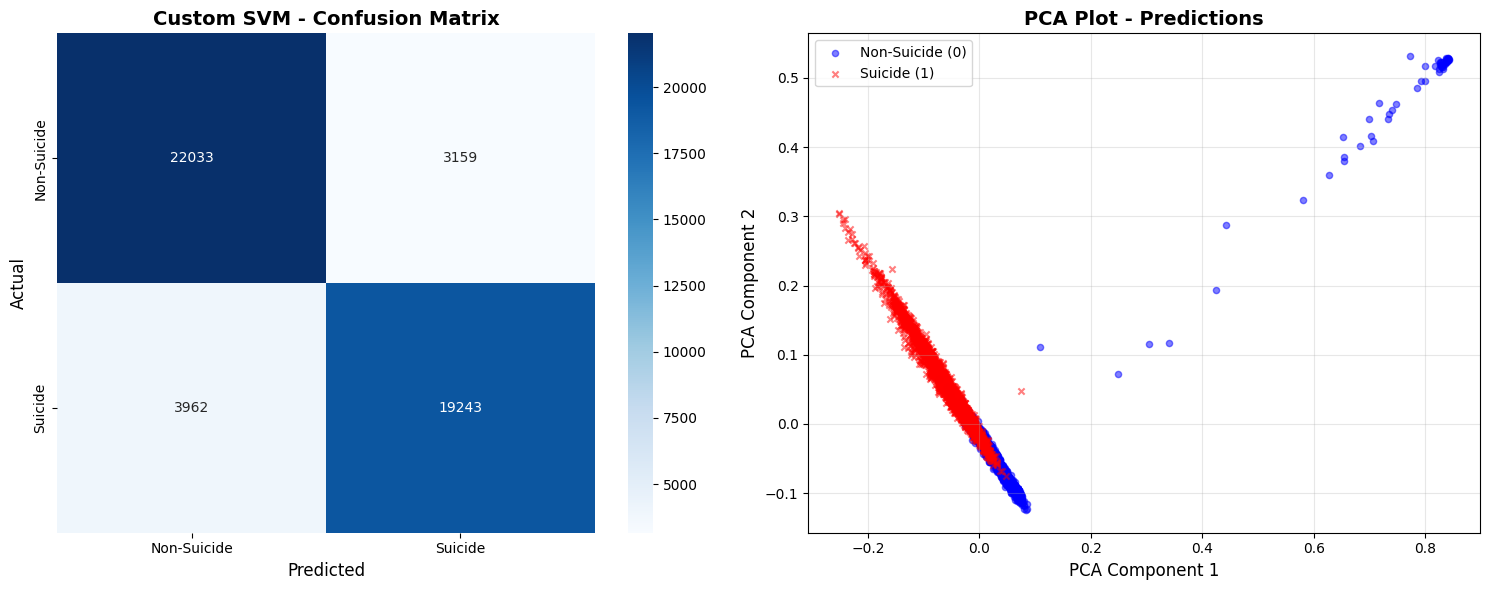





Training SVM on 201540 samples with 20000 features
Learning rate: 0.5, Lambda: 1e-05

Iter    1 | Acc: 0.5540 | SVs:  10000 | Pred(+1): 135461 | Pred(-1):  66079
Iter  100 | Acc: 0.6663 | SVs:   9922 | Pred(+1): 165363 | Pred(-1):  36177
Iter  200 | Acc: 0.7869 | SVs:   9644 | Pred(+1):  71887 | Pred(-1): 129653
Iter  300 | Acc: 0.8081 | SVs:   8482 | Pred(+1):  79844 | Pred(-1): 121696
Iter  400 | Acc: 0.8234 | SVs:   7437 | Pred(+1):  86139 | Pred(-1): 115401
Iter  500 | Acc: 0.8310 | SVs:   6900 | Pred(+1):  89385 | Pred(-1): 112155
Iter  600 | Acc: 0.8360 | SVs:   6469 | Pred(+1):  91007 | Pred(-1): 110533
Iter  700 | Acc: 0.8407 | SVs:   6078 | Pred(+1):  92753 | Pred(-1): 108787
Iter  800 | Acc: 0.8440 | SVs:   5754 | Pred(+1):  93622 | Pred(-1): 107918
Iter  900 | Acc: 0.8473 | SVs:   5678 | Pred(+1):  94704 | Pred(-1): 106836
Iter 1000 | Acc: 0.8499 | SVs:   5456 | Pred(+1):  95174 | Pred(-1): 106366
Iter 1100 | Acc: 0.8520 | SVs:   5249 | Pred(+1):  95546 | Pred(-1): 10599

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import load_npz, vstack
import joblib

# Load data
X_train = load_npz("/content/drive/MyDrive/FYP/X_train_tfidf.npz")
X_test  = load_npz("/content/drive/MyDrive/FYP/X_test_tfidf.npz")
y_train = joblib.load("/content/drive/MyDrive/FYP/y_train.pkl")
y_test = joblib.load("/content/drive/MyDrive/FYP/y_test.pkl")

y_train = np.where(y_train == "suicide", 1, 0)
y_test = np.where(y_test == "suicide", 1, 0)

print("Original Data:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Train - Non-suicide: {np.sum(y_train == 0)}, Suicide: {np.sum(y_train == 1)}")
print(f"Test - Non-suicide: {np.sum(y_test == 0)}, Suicide: {np.sum(y_test == 1)}")
print("=" * 60)

# BETTER BALANCING WITH SMOTE-LIKE APPROACH
from sklearn.utils import resample

idx_0 = np.where(y_train == 0)[0]
idx_1 = np.where(y_train == 1)[0]

print(f"\nOriginal class distribution:")
print(f"Class 0: {len(idx_0)} samples")
print(f"Class 1: {len(idx_1)} samples")

# Upsample minority class to match majority
if len(idx_1) < len(idx_0):
    # Upsample class 1 (suicide)
    idx_1_upsampled = resample(idx_1,
                                replace=True,
                                n_samples=len(idx_0),
                                random_state=42)
    balanced_indices = np.concatenate([idx_0, idx_1_upsampled])
else:
    # Upsample class 0 (non-suicide)
    idx_0_upsampled = resample(idx_0,
                                replace=True,
                                n_samples=len(idx_1),
                                random_state=42)
    balanced_indices = np.concatenate([idx_0_upsampled, idx_1])

# Shuffle indices
np.random.seed(42)
np.random.shuffle(balanced_indices)

# Create balanced dataset
X_train_bal = X_train[balanced_indices]
y_train_bal = y_train[balanced_indices]

print(f"\nBalanced class distribution:")
print(f"Class 0: {np.sum(y_train_bal == 0)} samples")
print(f"Class 1: {np.sum(y_train_bal == 1)} samples")
print("=" * 60)

class LinearSVM:
    def __init__(self, lr=0.1, lambda_param=0.0001, n_iters=1000, batch_size=None):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.w = None
        self.b = None

    def fit(self, X, y):
        y_ = np.where(y == 0, -1, 1).astype(float)
        n_samples, n_features = X.shape

        # Initialize weights with small random values
        self.w = np.random.randn(n_features) * 0.01
        self.b = 0.0

        is_sparse = hasattr(X, 'toarray')

        print(f"\nTraining SVM on {n_samples} samples with {n_features} features")
        print(f"Learning rate: {self.lr}, Lambda: {self.lambda_param}\n")

        for iteration in range(self.n_iters):
            # Mini-batch gradient descent
            if self.batch_size and self.batch_size < n_samples:
                indices = np.random.choice(n_samples, self.batch_size, replace=False)
                X_batch = X[indices]
                y_batch = y_[indices]
                batch_size = self.batch_size
            else:
                X_batch = X
                y_batch = y_
                batch_size = n_samples

            # Compute scores
            if is_sparse:
                scores = np.array(X_batch.dot(self.w)).ravel() + self.b
            else:
                scores = np.dot(X_batch, self.w) + self.b

            # Hinge loss subgradient
            margins = y_batch * scores
            sv_mask = margins < 1  # Support vectors

            # Compute gradients
            if is_sparse:
                if np.sum(sv_mask) > 0:
                    grad_w = self.lambda_param * self.w - (X_batch[sv_mask].T.dot(y_batch[sv_mask]) / batch_size)
                    grad_w = np.array(grad_w).ravel()
                    grad_b = -np.sum(y_batch[sv_mask]) / batch_size
                else:
                    grad_w = self.lambda_param * self.w
                    grad_b = 0.0
            else:
                if np.sum(sv_mask) > 0:
                    grad_w = self.lambda_param * self.w - (np.dot(X_batch[sv_mask].T, y_batch[sv_mask]) / batch_size)
                    grad_b = -np.sum(y_batch[sv_mask]) / batch_size
                else:
                    grad_w = self.lambda_param * self.w
                    grad_b = 0.0

            # Update weights
            self.w -= self.lr * grad_w
            self.b -= self.lr * grad_b

            if (iteration + 1) % 100 == 0 or iteration == 0:
                if is_sparse:
                    train_scores = np.array(X.dot(self.w)).ravel() + self.b
                else:
                    train_scores = np.dot(X, self.w) + self.b

                train_preds = np.where(train_scores >= 0, 1, -1)
                train_acc = np.mean(train_preds == y_)

                n_pos = np.sum(train_preds == 1)
                n_neg = np.sum(train_preds == -1)
                n_sv = np.sum(sv_mask)

                print(f"Iter {iteration+1:4d} | Acc: {train_acc:.4f} | "
                      f"SVs: {n_sv:6d} | Pred(+1): {n_pos:6d} | Pred(-1): {n_neg:6d}")

    def predict(self, X):
        if hasattr(X, 'toarray'):
            scores = np.array(X.dot(self.w)).ravel() + self.b
        else:
            scores = np.dot(X, self.w) + self.b
        return np.where(scores >= 0, 1, 0)


print("\nTRAINING CUSTOM SVM\n")

svm = LinearSVM(lr=0.5, lambda_param=0.00001, n_iters=1000, batch_size=10000)
svm.fit(X_train_bal, y_train_bal)

print("=" * 60)


print("\nMaking predictions on test set...")
preds = svm.predict(X_test)

print("\nPREDICTION DISTRIBUTION")
print("\n")
print(f"Predicted Non-Suicide (0): {np.sum(preds == 0)} ({np.sum(preds == 0)/len(preds)*100:.1f}%)")
print(f"Predicted Suicide (1): {np.sum(preds == 1)} ({np.sum(preds == 1)/len(preds)*100:.1f}%)\n")

#metrics
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, zero_division=0)
recall = recall_score(y_test, preds, zero_division=0)
f1 = f1_score(y_test, preds, zero_division=0)

print("\nCUSTOM SVM PERFORMANCE\n")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


cm = confusion_matrix(y_test, preds)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axes[0],
            xticklabels=["Non-Suicide", "Suicide"],
            yticklabels=["Non-Suicide", "Suicide"])
axes[0].set_title("Custom SVM - Confusion Matrix", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Predicted", fontsize=12)
axes[0].set_ylabel("Actual", fontsize=12)

print("\nGenerating PCA visualization...")
pca = PCA(n_components=2)
sample_size = min(5000, X_test.shape[0])
sample_indices = np.random.choice(X_test.shape[0], sample_size, replace=False)
X_test_sample = X_test[sample_indices].toarray()
preds_sample = preds[sample_indices]

X_test_2D = pca.fit_transform(X_test_sample)

axes[1].scatter(X_test_2D[preds_sample==0, 0], X_test_2D[preds_sample==0, 1],
                marker='o', label="Non-Suicide (0)", alpha=0.5, s=20, c='blue')
axes[1].scatter(X_test_2D[preds_sample==1, 0], X_test_2D[preds_sample==1, 1],
                marker='x', label="Suicide (1)", alpha=0.5, s=20, c='red')
axes[1].set_title("PCA Plot - Predictions", fontsize=14, fontweight='bold')
axes[1].set_xlabel("PCA Component 1", fontsize=12)
axes[1].set_ylabel("PCA Component 2", fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n\n")
svm = LinearSVM(lr=0.5, lambda_param=0.00001, n_iters=1500, batch_size=10000)
svm.fit(X_train_bal, y_train_bal)

print("=" * 60)

print("\nTraining complete!")